# Introdução a Aprendizado de Máquina

## Introdução

Utilizaremos a base de dados iris para esse tutorial. Essa é uma base de dados bastante conhecida contendo medidas das pétalas e sépalas da flor de íris. Os dados estão contidos em um arquivo chamado `Iris_Data.csv` encontrado no diretório [data](data).

In [226]:
import os
data_path = 'data/Iris_Data.csv'

## Exercício 1

Carregue os dados do arquivo usando as técnicas do tutorial *Introduction_to_Machine_Learning_and_Toolkit*. Examine o arquivo.

Indique o seguinte:

* O número de pontos (linhas) (*Dica:* verifique o atributo `.shape` do dataframe.)
* O nome das colunas. (*Dica:* verifique o atributo `.columns` do dataframe.)
* Os tipos associados a cada coluna. (*Dica:* verifique o atributo `.dtypes` do dataframe.)

In [227]:
import pandas as pd
data = pd.read_csv(data_path)

print(data.shape)

print('O numero de linhas eh ' + str(data.shape[0]))

print('Os nomes das colunas são:', end=" ")
for i in range(5):
    print(data.columns[i], end=" ")
print()
    
print(data.dtypes)

(150, 5)
O numero de linhas eh 150
Os nomes das colunas são: sepal_length sepal_width petal_length petal_width species 
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Exercício 2

Examine os nomes das espécies e note que todas elas começam com 'Iris-'. Remova essa parte do nome para tornar o nome mais curto. 

*Dica:* tem várias maneiras de fazer isso, você pode usar o [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) ou o [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html), por exemplo.

In [228]:
data['species'] = data['species'].str.replace('Iris-', '')

## Exercício 3

Determine:
* A quantidade de cada espécie presente na base. (*Dica:* verifique o método `.value_counts` da série.)
* A média, mediana, quantis e faixas (máximo-mínimo) para cada medida de pétala e sépala.

*Dica:* para a última parte, o método `.describe` tem mediana, mas é chamada de *50%* quantile. `.describe` não tem faixa, portanto você precisará criar uma nova entrada na tabela com `max - min`.

In [229]:
print(data['species'].value_counts())
print()

print('médias:\n', data.describe().loc['mean'])
print('quantis:\n', data.describe().loc['25%':'75%'])
data.describe().loc['max'][0]

rng = data.describe().loc['max'] - data.describe().loc['min']
rngPanda = pd.Series(rng)

print('faixas:\n', rngPanda)

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

médias:
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
Name: mean, dtype: float64
quantis:
      sepal_length  sepal_width  petal_length  petal_width
25%           5.1          2.8          1.60          0.3
50%           5.8          3.0          4.35          1.3
75%           6.4          3.3          5.10          1.8
faixas:
 sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64


## Exercício 4

Calcule **para cada espécie** em um dataframe separado:

* A média de cada medida (sepal_length, sepal_width, petal_length, e petal_width).
* A mediana dessas medidas.

*Dica:* você pode usar o método [`groupby`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) do Pandas para agrupar as espécies antes de calcular as estatísticas.

Se você terminar ambos os cálculos, tente calcular a média e mediana em uma única tabela (com uma única chamada de groupby). Veja a seção da documentação [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) para algumas dicas.

In [230]:
table = data.groupby('species').describe()
wanted_values = ['mean', '50%']
measures = data.describe().columns.values

for s in set(data['species']):
    print('for species \'%s\':'%(s))
    for m in measures:
        print('for %s:' % (m))
        for val in wanted_values:
            print('%s: %.2f' % (val, table[m][val][s]))
    print()

for species 'virginica':
for sepal_length:
mean: 6.59
50%: 6.50
for sepal_width:
mean: 2.97
50%: 3.00
for petal_length:
mean: 5.55
50%: 5.55
for petal_width:
mean: 2.03
50%: 2.00

for species 'setosa':
for sepal_length:
mean: 5.01
50%: 5.00
for sepal_width:
mean: 3.42
50%: 3.40
for petal_length:
mean: 1.46
50%: 1.50
for petal_width:
mean: 0.24
50%: 0.20

for species 'versicolor':
for sepal_length:
mean: 5.94
50%: 5.90
for sepal_width:
mean: 2.77
50%: 2.80
for petal_length:
mean: 4.26
50%: 4.35
for petal_width:
mean: 1.33
50%: 1.30



## Exercício 5

Faça um scatter plot de `sepal_length` vs `sepal_width` usando Matplotlib. Coloque um `label` nos eixos e dê um título ao gráfico.

Text(0,0.5,'Width')

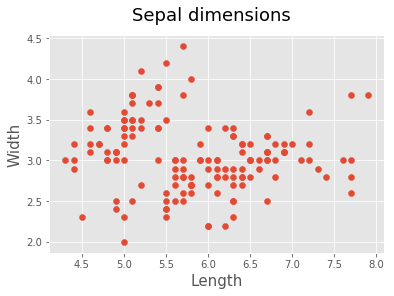

In [231]:
import matplotlib.pyplot as pp
plot = pp.figure()
pp.scatter(data['sepal_length'], data['sepal_width'])
plot.suptitle('Sepal dimensions', fontsize = 18)
pp.xlabel('Length', fontsize = 15)
pp.ylabel('Width', fontsize = 15)

## Exercício 6

Faça um histograma de qualquer um dos quatro atributos. Nomeie os eixos e dê um título apropriado.

Text(0.5,0.98,'Histogram of petal lengths')

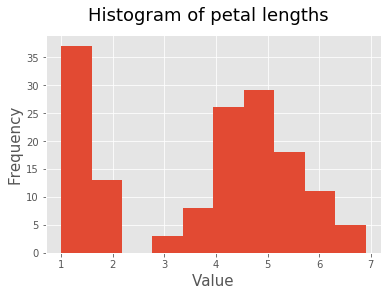

In [232]:
pp.hist(data['petal_length'])
pp.xlabel('Value', fontsize = 15)
pp.ylabel('Frequency', fontsize = 15)
pp.suptitle('Histogram of petal lengths', fontsize = 18)

## Exercício 7

Agora crie um único gráfico com histogramas para cada atributo (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) sobrepostos. 

Dicas para fazer isso com os métodos de plotagem do Pandas se encontram em [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html).

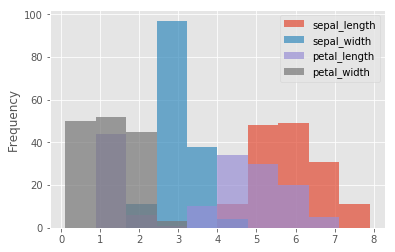

In [233]:
import matplotlib
matplotlib.style.use('ggplot')
pp.figure(figsize=(15, 15))
data.plot.hist(alpha = 0.7, bins = 10)

## Exercício 8

Usando Pandas, faça um boxplot de cada medida da pétala e sépala. Veja a documentação para algumas dicas [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

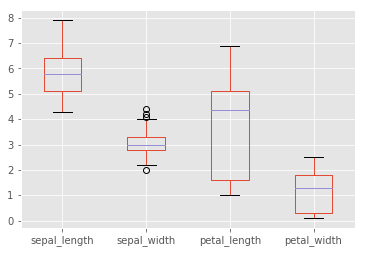

In [234]:
table = data
table.plot.box()

## Exercício 9

Agora faça um único boxplot onde os atributos estão separados no eixo-x e as espécies são coloridas por tons de cores diferentes.

*Dica:* veja a documentação para [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Note que o Seaborn é bem exigente quanto ao formato dos dados--para esse plot funcionar, o dataframe de entrada precisa ser manipulado para que cada linha contenha um único ponto (uma espécie, um tipo de medida e um valor da medida). Veja o Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) como uma dica.

Um exemplo desse formato para essa base:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [240]:

# import seaborn as sns
# ax = sns.boxplot(data = sns_table)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

## Exercício 10

Faça um  [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) com o Seaborn para examinar a correlação entre cada uma das medidas.

*Dica:* esse plot pode parecer complicado, mas é na verdade uma única linha de código. Esse é o poder de expressabilidade do Seaborn junto do Pandas.

NameError: name 'alo' is not defined